In [3]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

Load The Data

In [4]:
X_train = np.loadtxt('input.csv', delimiter = ',')
Y_train = np.loadtxt('labels.csv', delimiter = ',')

X_test = np.loadtxt('input_test.csv', delimiter = ',')
Y_test = np.loadtxt('labels_test.csv', delimiter = ',')

X_train = X_train.reshape(len(X_train), 100, 100, 3)
Y_train = Y_train.reshape(len(Y_train), 1)

X_test = X_test.reshape(len(X_test), 100, 100, 3)
Y_test = Y_test.reshape(len(Y_test), 1)

#making the value of images from 0-1 for easy training
X_train = X_train/255.0
X_test = X_test/255.0

Show the data shapes

In [6]:
print("Shape of X_train: ", X_train.shape)
print("Shape of Y_train: ", Y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of Y_test: ", Y_test.shape)

Shape of X_train:  (2000, 100, 100, 3)
Shape of Y_train:  (2000, 1)
Shape of X_test:  (400, 100, 100, 3)
Shape of Y_test:  (400, 1)


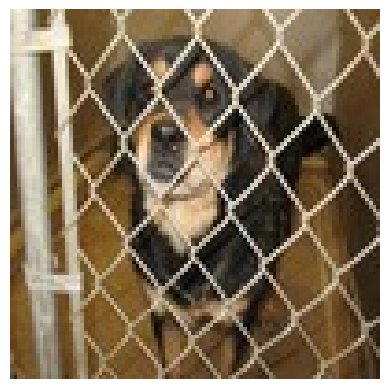

In [8]:
idx = random.randint(0, len(X_train))
plt.imshow(X_train[idx, :])
plt.axis(False)
plt.show()

# Model

In [9]:
model = Sequential([
    Conv2D(32, (3,3), activation = 'relu', input_shape = (100, 100, 3)),
    MaxPooling2D((2,2)),
    
    Conv2D(32, (3,3), activation = 'relu'),
    MaxPooling2D((2,2)),
    
    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

2024-08-05 21:46:10.394977: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


## Alternative way to create the CNN layers

In [ ]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (100, 100, 3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

# Setting the parameters

In [10]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# Train the Model

In [13]:
model.fit(X_train, Y_train, epochs = 15, batch_size = 64)

Epoch 1/15
32/32 [==============================] - 54s 2s/step - loss: 0.0176 - accuracy: 0.9995
Epoch 2/15
32/32 [==============================] - 81s 3s/step - loss: 0.0093 - accuracy: 1.0000
Epoch 3/15
32/32 [==============================] - 66s 2s/step - loss: 0.0062 - accuracy: 1.0000
Epoch 4/15
32/32 [==============================] - 64s 2s/step - loss: 0.0047 - accuracy: 1.0000
Epoch 5/15
32/32 [==============================] - 51s 2s/step - loss: 0.0034 - accuracy: 1.0000
Epoch 6/15
32/32 [==============================] - 43s 1s/step - loss: 0.0025 - accuracy: 1.0000
Epoch 7/15
32/32 [==============================] - 42s 1s/step - loss: 0.0021 - accuracy: 1.0000
Epoch 8/15
32/32 [==============================] - 42s 1s/step - loss: 0.0018 - accuracy: 1.0000
Epoch 9/15
32/32 [==============================] - 42s 1s/step - loss: 0.0016 - accuracy: 1.0000
Epoch 10/15
32/32 [==============================] - 43s 1s/step - loss: 0.0014 - accuracy: 1.0000
Epoch 11/15
32/32 [

## Evaluate the performance

In [14]:
model.evaluate(X_test, Y_test)

13/13 [==============================] - 3s 228ms/step - loss: 1.9786 - accuracy: 0.6850


[1.9786155223846436, 0.6850000023841858]

# Making Predictions

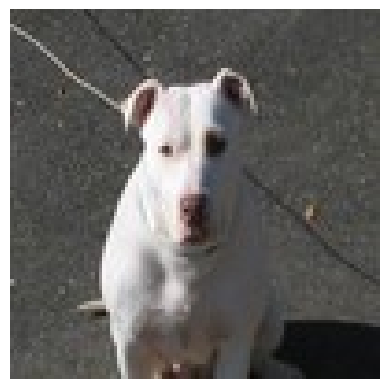

1/1 [==============================] - 0s 38ms/step
Our model says it is a : dog


In [54]:
idx2 = random.randint(0, len(Y_test))
plt.imshow(X_test[idx2, :])
plt.axis(False)
plt.show()

y_pred = model.predict(X_test[idx2, :].reshape(1, 100, 100, 3))
y_pred = y_pred > 0.5

if(y_pred == 0):
    pred = 'dog'
else:
    pred = 'cat'
    
print("Our model says it is a :", pred)